<a href="https://colab.research.google.com/github/indmind/2141720003-pcvk-2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

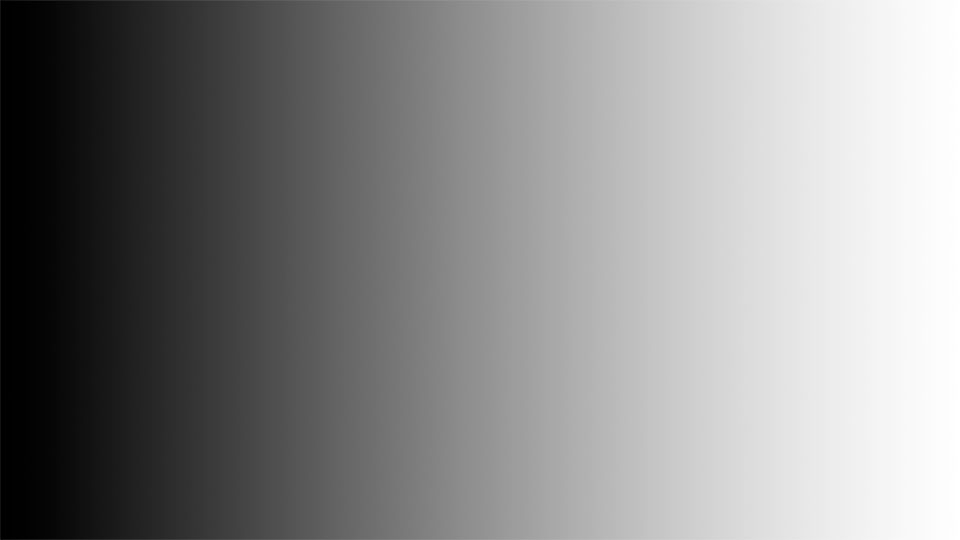

In [27]:
img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/image_thres/gradient.jpg')

cv2_imshow(img)

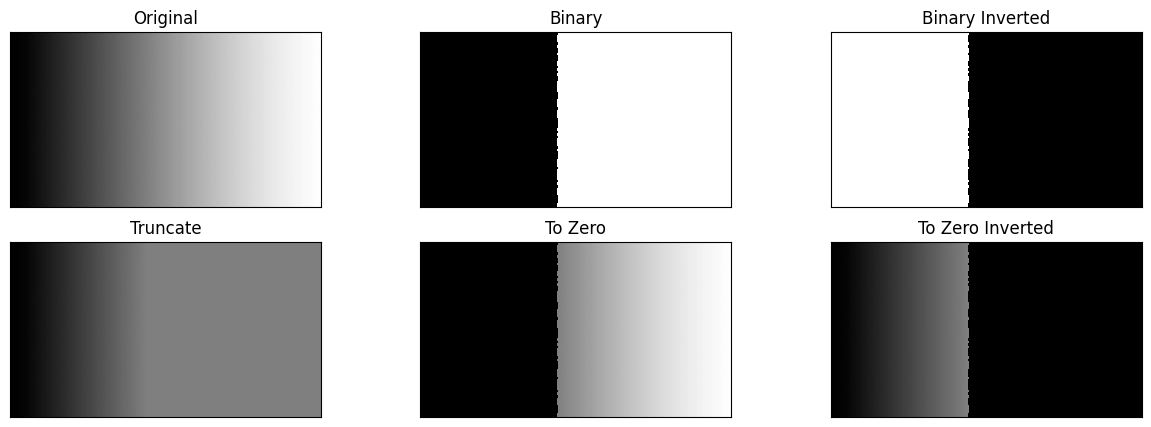

In [28]:
thresh = 127 #nilai Threshold yang ditentukan

_,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
_,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
_,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
_,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
_,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original','Binary','Binary Inverted','Truncate', 'To Zero', 'To Zero Inverted']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

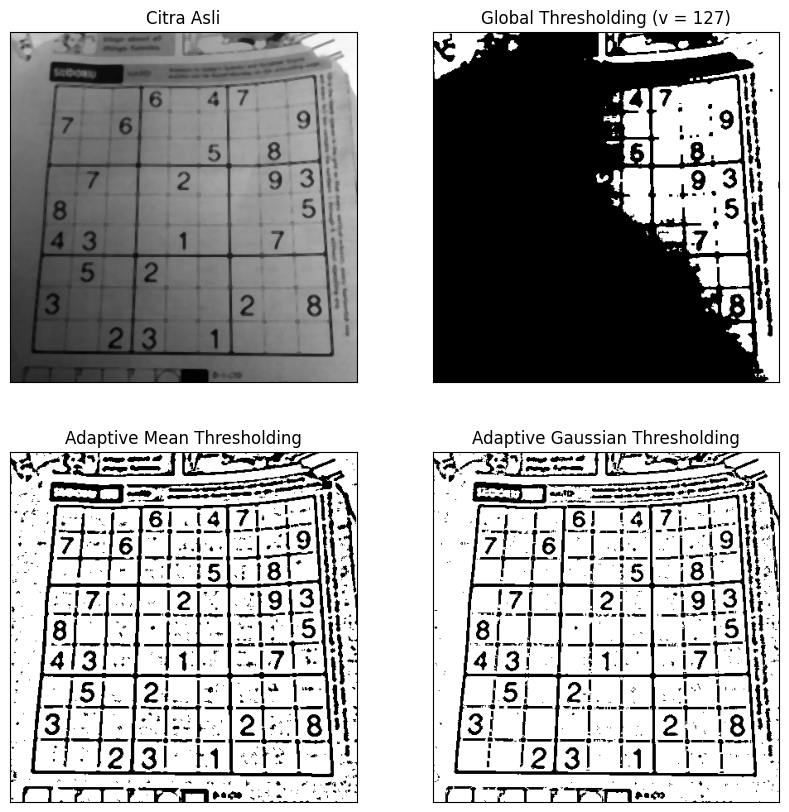

In [29]:

img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/image_thres/sudoku-original.jpg')
citra = cv.medianBlur(img,5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

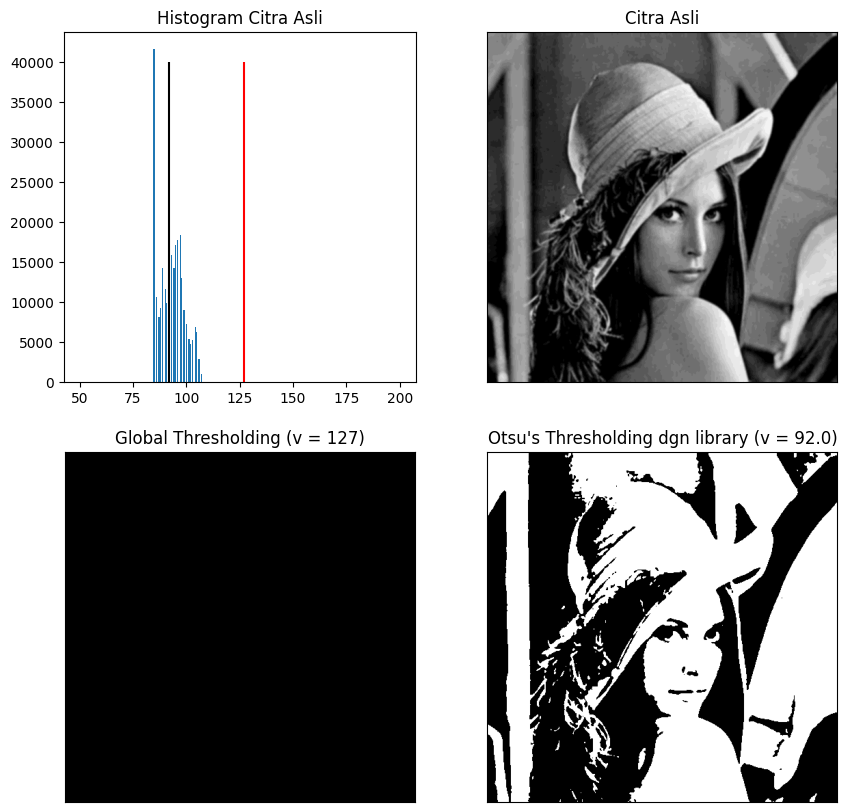

In [30]:

filename = ('/content/drive/MyDrive/Semester 5/pcvk/image_thres/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

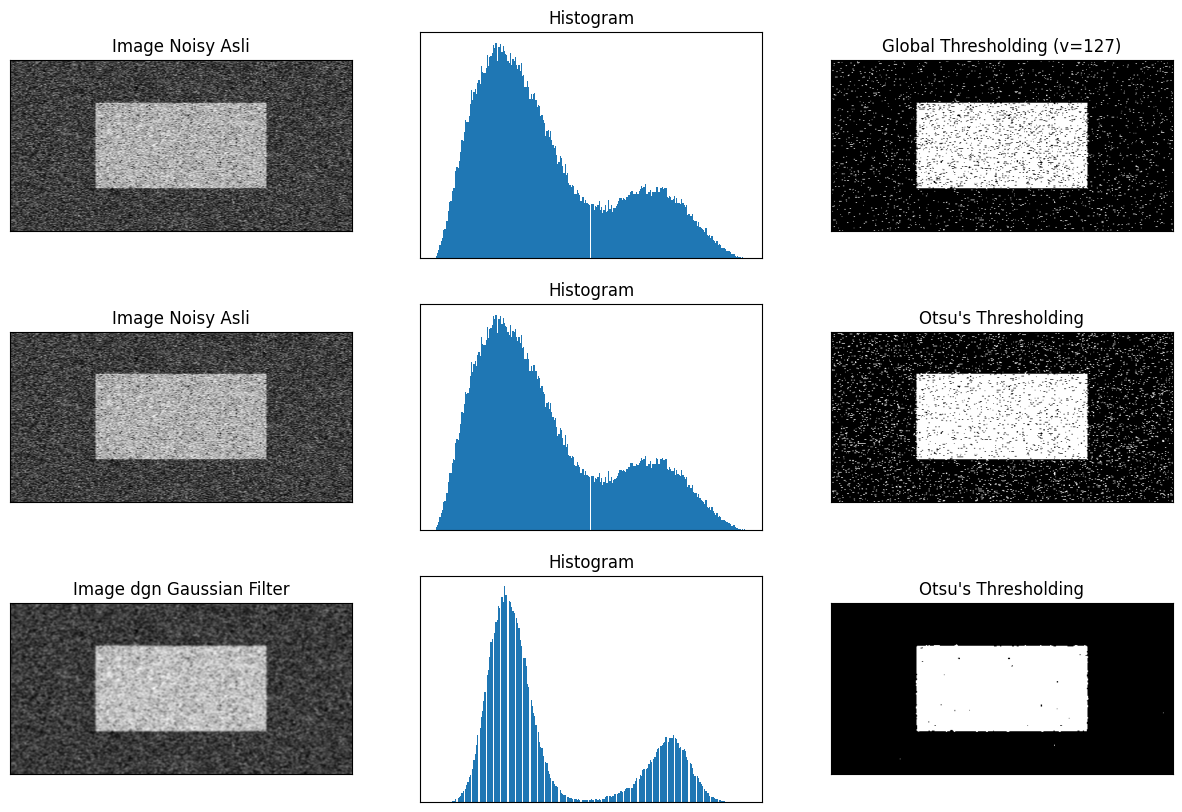

In [31]:
filename = ('/content/drive/MyDrive/Semester 5/pcvk/image_thres/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7f1fb730c280>)

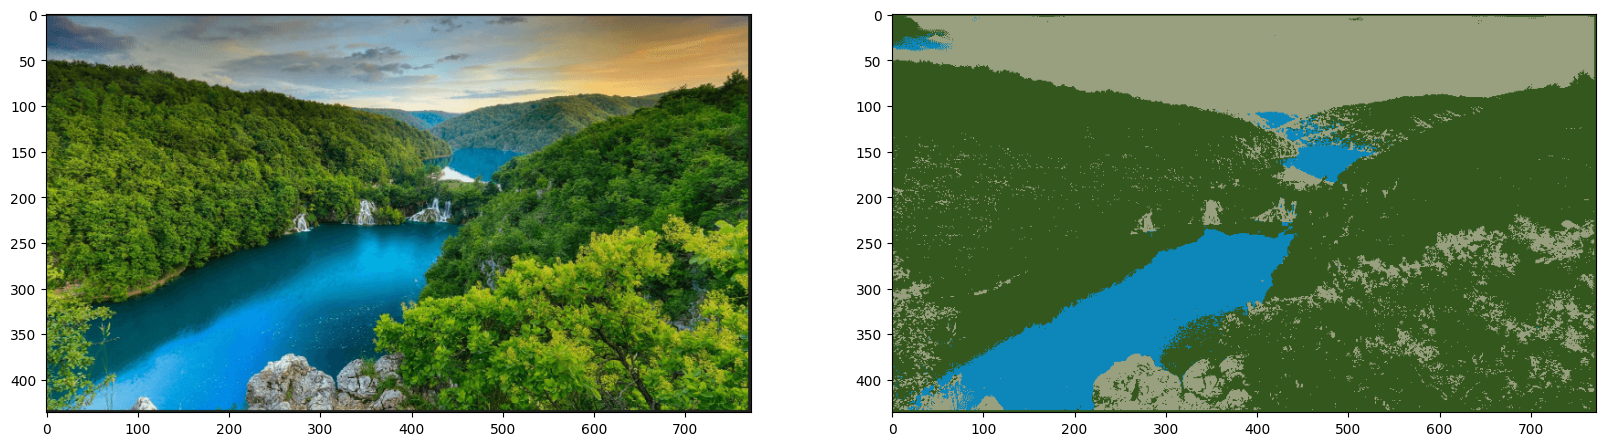

In [32]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/Semester 5/pcvk/image_thres/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f1fc01420b0>)

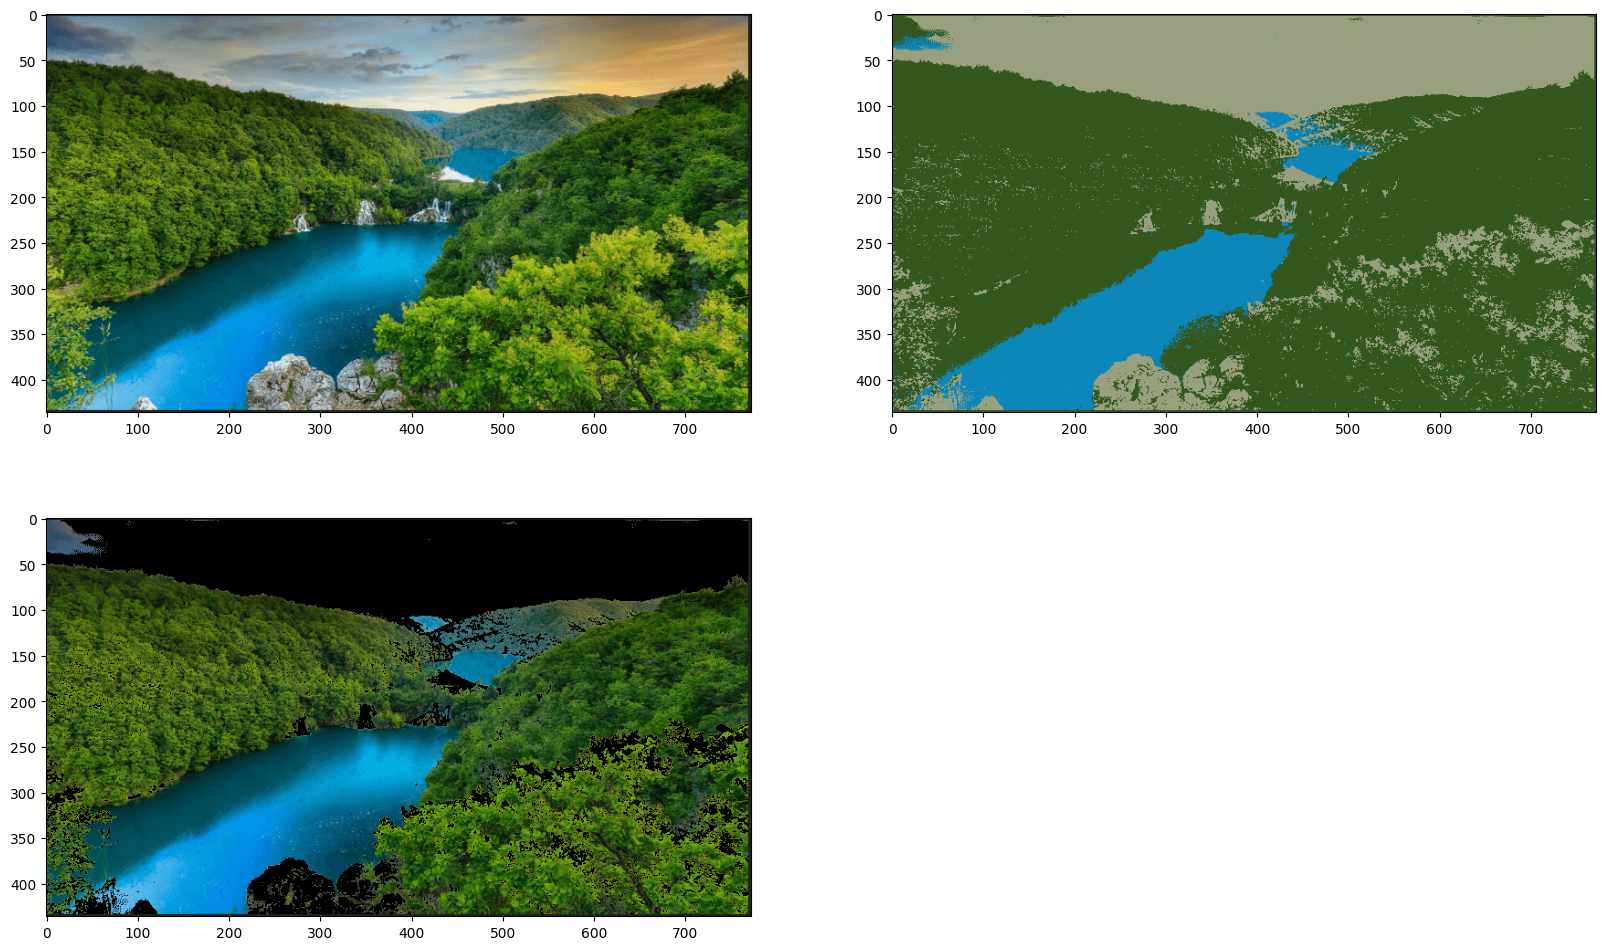

In [33]:

# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)


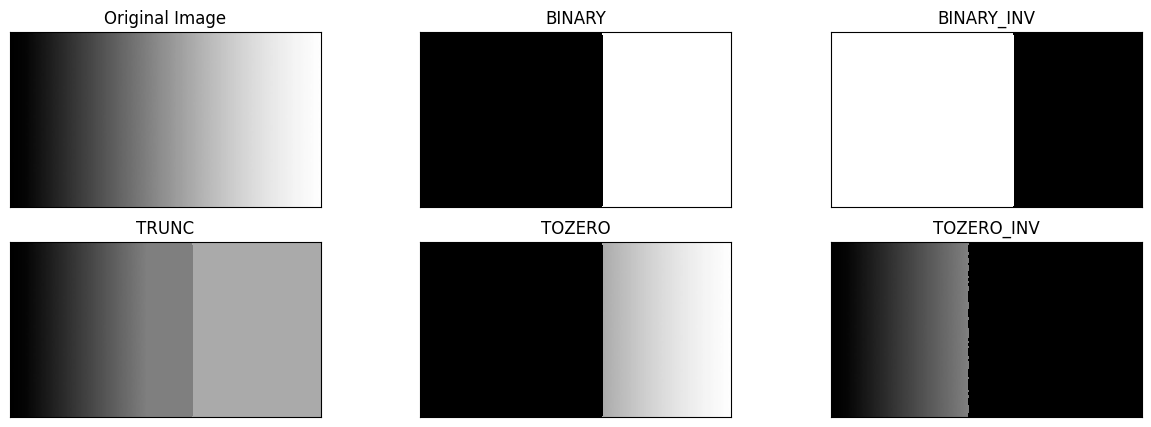

In [34]:
img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/image_thres/gradient.jpg')

thresh = 170 # nilai Threshold yang ditentukan

# 1. Binary
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0
# 2. Binary Threshold Inverse
thresh2 = 255 - thresh1
# 3. Threshold Truncate
thresh3[img > thresh] = thresh
# 4. Threshold Tozero
thresh4[img <= thresh] = 0
# 5. Threshold Tozero Inverse
thresh5[img > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


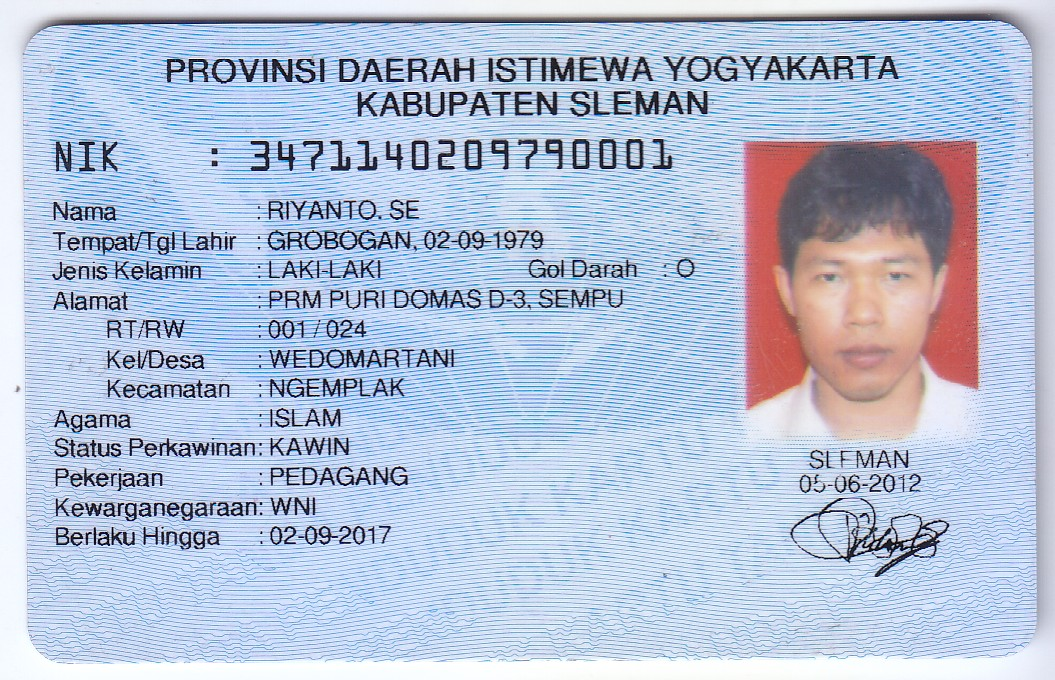

In [35]:
img = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/riyanto.png')

cv2_imshow(img)

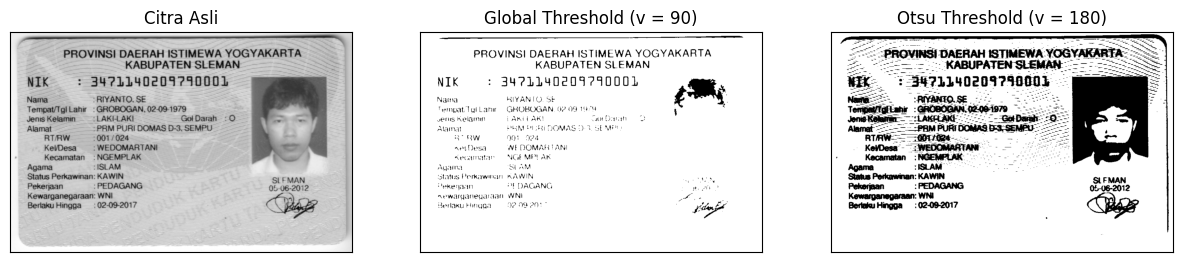

In [36]:
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Lakukan Gaussian Blur
ksize = (5, 5)
sigmaX = 0
blur = cv.GaussianBlur(img, ksize, sigmaX)

# Hitung threshold global
global_threshold = 90
_, th1 = cv.threshold(blur, global_threshold, 255, cv.THRESH_BINARY)

# Hitung threshold Otsu secara manual
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist /= hist.sum()
variance = np.zeros((256, 1))

for t in range(256):
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    if q1 == 0 or q2 == 0:
        continue
    m1 = np.sum(np.arange(t) * hist[:t]) / q1
    m2 = np.sum(np.arange(t, 256) * hist[t:]) / q2
    variance[t] = q1 * q2 * (m1 - m2) ** 2

ret2 = np.argmin(np.abs(variance - (150 ** 2)))

_, th2 = cv.threshold(blur, ret2, 255, cv.THRESH_BINARY)

x = "Otsu Threshold (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Threshold (v = 90)', x]
citra3 = [blur, th1, th2]

# Tampilkan citra
plt.figure(figsize=(15, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

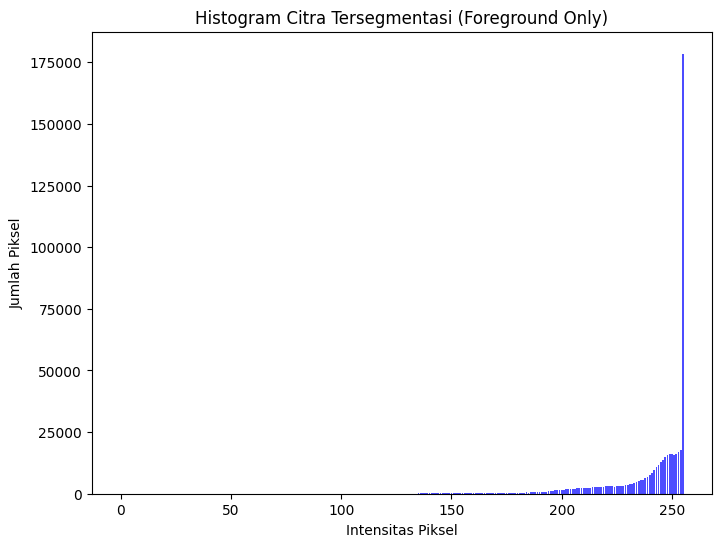

In [37]:
image = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/riyanto.png')
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
# Terapkan Otsu Thresholding untuk segmentasi
_, thresholded_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Hitung histogram hanya pada foreground image (objek gambar)
histogram_foreground = cv.calcHist([image], [0], thresholded_image, [256], [0, 256])

# Tampilkan histogram
plt.figure(figsize=(8, 6))
plt.title("Histogram Citra Tersegmentasi (Foreground Only)")
plt.xlabel("Intensitas Piksel")
plt.ylabel("Jumlah Piksel")
plt.bar(np.arange(256), histogram_foreground[:, 0], color='b', alpha=0.7)
plt.show()